In [ ]:
# input the value for La and Lb:
m=int(input("La="))
n=int(input("Lb="))
if m+n!=10:# if the sum of La and Lb is not ten, raise valueerror.
    print("The sum of La and Lb should equal to 10.")
    raise ValueError

mySystem={"type1":{"number":50, "La":m , "Lb":n}}
h=list(mySystem.keys())
#these are the variables that will be used later
totaldelta=[]   
totalexp=[]
allposition1=[]
alltypes=[]
totalenergy=[]
import numpy as np
import math
import matplotlib.pyplot as plt
import copy

#import values for sigma_b and kspring
sigma_B=float(input("sigma_B="))
kspring=float(input("kspring="))

#the constants:
sigma_A=1
sigma_AB=0.5 *(sigma_A+sigma_B)
eps_AA=5
eps_BB=5
eps_AB=1
steps=int(input("nSteps="))

In [2]:
#The class below is to allocate the types and positions of monomer inside the polymers randomly.
class sorttype():
    def __init__(self,a):
        self.x=a
        return
    def typeandposition(self):#
        a1=0
        b1=0
    
        typeofmonomer=[]
        # so inside one polymer: allocate the types of monomer first:  
        for x in range( 10 ):
            c=np.random.rand() 
                
            if a1<self.x["La"] or b1<self.x["Lb"]:#before the number of monomer A and B reaching the value of La and Lb
                                                  # i.e.before reaching the limits:
                if c<0.5:
                    typeofmonomer.append("A")        
                    a1+=1
                        
                else:
                    typeofmonomer.append("B")         
                    b1+=1
            if a1==self.x["La"] :# if the number of monomer A reaching the limits:
                for n in range(10-self.x["La"]-b1):# the rest of the monomers that have not been allocated will all be B.
                    typeofmonomer.append("B")
                    n+=1
                break
                    
            if b1==self.x["Lb"]:# if the number of monomer B reaching the limits:
                for n in range(10-self.x["Lb"]-a1):#the rest of the monomers that have not been allocated will be A.
                    typeofmonomer.append("A")
                
                    n+=1
                break
        alltypes.append(typeofmonomer)#the "alltypes" lists will be the one representing the monomer types in the 50 polymers
        position1=[]# this is the set of the positions of the monomers in one polymer.
        
        x1=np.random.rand()*40
        y1=np.random.rand()*40

        position1.append([x1,y1])# this is the position of the first monomer in the polymer

        for i in range(9):#so for the rest of the monomers: 
    
            if typeofmonomer[i]=="A" and typeofmonomer[i+1]=="A":#if the latest determined one and the next one are both type A
                rcutoff=2.5*sigma_A
        
                while True :
        
                    x2=np.random.rand()*40
                    y2=np.random.rand()*40
        
                    if  (x2-x1)**2+(y2-y1)**2<rcutoff**2 and (x2-x1)**2+(y2-y1)**2>sigma_A**2  :
                # the distance between the two monomers has to be greater than sigma_A and smaller than 2.5sigma_A
                        position1.append([x2,y2])
                 # after the interpreter gets a position that suits, add it to the position set
                        break
    
            if typeofmonomer[i]=="B" and typeofmonomer[i+1]=="B":
        #if the latest determined one and the next one are both type B
                rcutoff=2.5*sigma_B

                while True:
            
                    x2=np.random.rand()*40
                    y2=np.random.rand()*40
        
                    if  (x2-x1)**2+(y2-y1)**2<=rcutoff**2 and (x2-x1)**2+(y2-y1)**2>sigma_B**2 :
                 # the distance between the two monomers has to be greater than sigma_B and smaller than 2.5sigma_B
                        position1.append([x2,y2])
                
                        break            
            
            if typeofmonomer[i]!=typeofmonomer[i+1]:
        # if the latest determined one and the next one are not the same type, i.e. one of them is A and the other one is B:
                rcutoff=2.5* sigma_AB
                while True:
            
                    x2=np.random.rand()*40
                    y2=np.random.rand()*40
            
                    if  (x2-x1)**2+(y2-y1)**2<=rcutoff**2 and (x2-x1)**2+(y2-y1)**2>sigma_AB**2 :
                        position1.append([x2,y2])
                
                        break
        allposition1.append(position1)
       # the set "allposition1" will be the initial position of all the polymers
        return       

In [3]:

for m in h:
    for i in range(mySystem[m]["number"]):
        aa=sorttype(mySystem[m])
        aa.typeandposition()
#so the code above will run for 50 times, i.e.for all the polymers.
#from this line on, "alltypes" contains all informations of the monomer types
#"allposition1" contains the positions of all monomers before the random moves.

In [4]:
class move():
    def __init__(self):
          
        return
    
    def randommove(self):#generate random move
       
        
        b2=copy.deepcopy(allposition1)#b2 is the copy of the position information
        # in the 50 polymers:
        m=int(np.random.rand()*50) #which polymer is about to move
        n=int(np.random.rand()*10) # in that polymer, which bead is about to move
        q=np.random.rand()      # the probalility which indicates in which direction the monomer moves
        p=np.random.rand()*0.2  #by how much it moves
        if q<=0.25 :# move in positive x diriction 
    
            c=b2[m][n][0]
    
            b2[m][n][0]=c+p
    
        elif q>0.25 and q <=0.5 :# move in negative x diriction  
    
            c= b2[m][n][0]
    
            b2[m][n][0]=c-p
        
        elif q>0.5 and q <=0.75 :# move in positive y diriction 
            
            c= b2[m][n][1]
    
            b2[m][n][1]=c+p
    
        elif q>0.75 and q <=1 :# move in negative y diriction 
            
            c=b2[m][n][1]
    
            b2[m][n][1]=c-p
        b3.append(b2)
        #b3 is the list that take the position after the random move
        return 
        

In [5]:
class calculate(move):#calculate the energies
    
    def etot1(self):#calculate the total energy before the random move
        a2=copy.deepcopy(alltypes)
        b2=copy.deepcopy(allposition1)
        E1=0
        # this energy only takes those who bond together into account.
        for i in range(50):# within a polymer:
            for m in range(9):#as there are only 9 bonds within a polymer of length 10
                
                c=(b2[i][m][0]-b2[i][m+1][0])**2 + (b2[i][m][1]-b2[i][m+1][1])**2
                # c is the square of the distance between 2 bonded monomers
                d=0.5*kspring*c
                #this is the equation for eharmonic energy
                E1+=d
        # after this loop, the value of "E1" is the sum of the eharmonic energy in the system before the random move
        
        a22=sum(a2,[])
        b22=sum(b2,[])
        ELJ1=0
        # the ELJ  is between the monomer and other 499 monomers(potentially).
        for i in range(499):
            if a22[i]=="A": # if the first monomer is typeA
                for m in range(-(499-i),0):
                    c=(b22[m][0]-b22[m+1][0])**2 + (b22[m][1]-b22[m+1][1])**2
                    # the distance between the 2 monomers that are about to calculate
                    if a22[m]=="A": # if the other one is also type A
                        rcutoff=2.5*sigma_A
                        
                        if c<=rcutoff**2:# if the distance between the 2 monomers is smaller than the cutoff radius
                            d=4 * eps_AA * ((sigma_A/abs(c**0.5))**12-(sigma_A/abs(c**0.5))**6)
                            #calculate ELJ between them and add it 
                            ELJ1+=d 
                    if a22[m]=="B":# if the other one is type B
                        rcutoff=2.5*sigma_AB
                                
                        if c<=rcutoff**2:
                            d=4 * eps_AB * ((sigma_AB/abs(c**0.5))**12-(sigma_AB/abs(c**0.5))**6)
                            ELJ1+=d 
                    
            if a22[i]=="B":
                for m in range(-(499-i),0):
                    c=(b22[m][0]-b22[m+1][0])**2 + (b22[m][1]-b22[m+1][1])**2
                    
                    if a22[m]=="A":
                        rcutoff=2.5*sigma_AB
                        
                        if c<=rcutoff**2:
                            d=4 * eps_AA * ((sigma_A/abs(c**0.5))**12-(sigma_A/abs(c**0.5))**6)
                            ELJ1+=d 
                    if a22[m]=="B":
                        rcutoff=2.5*sigma_B
                                
                        if c<=rcutoff**2:
                            d=4 * eps_AB * ((sigma_AB/abs(c**0.5))**12-(sigma_AB/abs(c**0.5))**6)
                            ELJ1+=d 
        Etot1=E1+ELJ1                                           
        return  Etot1  
    
    def etot2(self):# the following code calculates the total energy of the system after the random move
        a2=copy.deepcopy(alltypes)
        b2=copy.deepcopy(allposition2)
        E2=0
        for i in range(50):
            for m in range(9):
                
                c=(b2[i][m][0]-b2[i][m+1][0])**2 + (b2[i][m][1]-b2[i][m+1][1])**2
                d=0.5*kspring*c
                E2+=d
        

        a22=sum(a2,[])
        b22=sum(b2,[])
        ELJ2=0
        
        for i in range(499):
            if a22[i]=="A":
                for m in range(-(499-i),0):
                    c=(b22[m][0]-b22[m+1][0])**2 + (b22[m][1]-b22[m+1][1])**2
                    
                    if a22[m]=="A":
                        rcutoff=2.5*sigma_A
                        
                        if c<=rcutoff**2:
                            d=4 * eps_AA * ((sigma_A/abs(c**0.5))**12-(sigma_A/abs(c**0.5))**6)
                            ELJ2+=d 
                    if a22[m]=="B":
                        rcutoff=2.5*sigma_AB
                                
                        if c<=rcutoff**2:
                            d=4 * eps_AB * ((sigma_AB/abs(c**0.5))**12-(sigma_AB/abs(c**0.5))**6)
                            ELJ2+=d 
                    
            if a22[i]=="B":
                for m in range(-(499-i),0):
                    c=(b22[m][0]-b22[m+1][0])**2 + (b22[m][1]-b22[m+1][1])**2
                    
                    if a22[m]=="A":
                        rcutoff=2.5*sigma_AB
                        
                        if c<=rcutoff**2:
                            d=4 * eps_AA * ((sigma_A/abs(c**0.5))**12-(sigma_A/abs(c**0.5))**6)
                            ELJ2+=d 
                    if a22[m]=="B":
                        rcutoff=2.5*sigma_B
                                
                        if c<=rcutoff**2:
                            d=4 * eps_AB * ((sigma_AB/abs(c**0.5))**12-(sigma_AB/abs(c**0.5))**6)
                            ELJ2+=d 
        Etot2=E2+ELJ2
        totalenergy.append(Etot2)
        return  Etot2 
    

<Figure size 432x288 with 0 Axes>

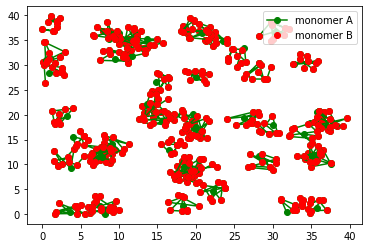

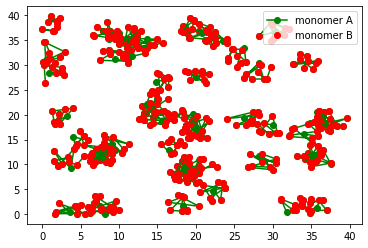

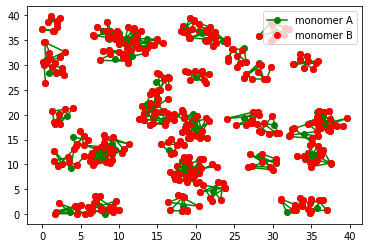

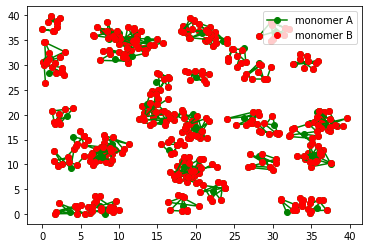

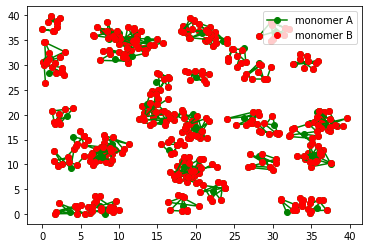

In [6]:
if __name__=="__main__":
    fig = plt.figure()
    plt.ion()
    plt.show()
    ims1=[]
    ims2=[]
    for i in range(steps):
    
        jisuan=calculate()
        b3=[]
        aaa=move()
        aaa.randommove()
        # "b3" will take over the result of the random move section(the positions after random move)
        allposition2=sum(b3,[])
    
        DE=jisuan.etot2()-jisuan.etot1()
        # calculate the change in energy
    
        if DE<0:
    
            allposition1=allposition2
            #the system will adapt to the new configuration.
            # in the next calculation, the system will generate another random move based on the new configuration
    
        if DE>0 :
            totaldelta.append(DE)
            #totalenergy.append(jisuan.etot2())
    
            f=math.exp(-DE)
            totalexp.append(f)
    
            X=np.random.rand()
    
            if f<X:
        
                allposition1=allposition2
                    #print("Accept new configuration.")
                
            else:
        
                allposition2=allposition1
                totalenergy.remove(totalenergy[-1])
                # if the new configuration is not accepted, remove the totalenergy data just added.
                # the configuration has not been changed due to the move, therefore the total energy of the system is not changed.
                
        f = open('C:/python projects/InformationOfBeads.txt','w+')#the path should change in different situations
        heading0=' random move'
        heading1='Type of Monomer'
        heading2='Coordinations of Monomers'
        heading3='Total Energy after move'
        
        for i in range(steps):
            Steps=str(i+1)
            f.write(Steps)
            f.write(heading0)
            f.write('\n')
            # number of random move
            
            f.write(heading1)
            f.write('\n')
            for item in alltypes:
                f.write('{}'.format(item))
            f.write('\n')
             #generate all the monomer types 
            #The types are generated by one polymer as the unit, 50 in total.
            #The followings are the same.
            f.write(heading2)
            f.write('\n')
            for item in allposition2:
                f.write('{}'.format(item))
            f.write('\n')    
             #generate all the positions after move 
            
            f.write(heading3)
            f.write('\n')
            f.write('{}'.format(totalenergy))
            f.write('\n')
            f.write('\n')
            f.write('\n')
            # generate the total energy after random move
            
        f.close()
        for n in range(50):
            x=[]
            y=[]
            x2=[]
            y2=[]
            for m in range(10):
                x.append(allposition2[n][m][0])
                y.append(allposition2[n][m][1])
                
                    
                if alltypes[n][m]=="B":
                    x2.append(allposition2[n][m][0])
                    y2.append(allposition2[n][m][1])
                    
            
            #im1=plt.plot(x,y,'go-', label='monomer A')
            im1=plt.plot(x,y,'go-')
            #im2=plt.plot( x2 , y2 , 'ro', label='monomer B')
            im2=plt.plot( x2 , y2 , 'ro')
        hehe=[]
        haha=[]
        plt.plot(hehe,haha,'go-',label='monomer A')
        plt.plot(hehe,haha,'ro', label='monomer B')
        plt.legend()
        ims1.append(im1)
        ims2.append(im2)
             
        plt.draw()
        plt.pause(0.5)
        


[403.40673828125, 1.625, 0.82861328125, 0.15234375]


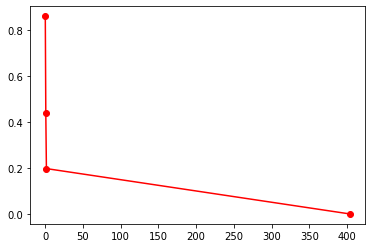

In [7]:
totaldelta.sort(reverse=True)
print(totaldelta)
totalexp.sort()
plt.plot(totaldelta,totalexp,'ro-')
plt.show()

In [8]:
themean=[]
lst_sigma_b =[0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]


lista = [1,2,3,4,5,6,7,8,9]
listb = [9,8,7,6,5,4,3,2,1]
for itemab in range(len(lista)):
    itemla = lista[itemab]
    itemlb = listb[itemab]
    for itemsb in range(9):
        sigma_B = lst_sigma_b[itemsb]
        mySystem = {"type1":{"number":50, "La":itemla , "Lb":itemlb}}
        h=list(mySystem.keys())
        sigma_AB=0.5 *(sigma_A+sigma_B)
        totaldelta=[]   
        totalexp=[]
        allposition1=[]
        alltypes=[]
        totalenergy=[]
        kspring = 1
        for mmm in h:
            for i in range(mySystem[mmm]["number"]):
                aa=sorttype(mySystem[mmm])
                aa.typeandposition()
            for ii in range(steps):
                jisuan=calculate()
                b3=[]
                aaa=move()
                aaa.randommove()
                
                allposition2=sum(b3,[])
                jisuan.etot2()
               
        b=np.mean(totalenergy)
        c=math.log(b)
        themean.append(c)


47.322569426134706
65.06230666995141
43.068582685894604
35.49223239970437
42.945034594255034
34.23055105268292
31.89022344863202
39.422068272867186
43.28048925578144
46.43926023961922
45.98017503565278
46.246221381079806
42.06974751778187
32.486226584236256
36.795903143050054
23.122572397705447
37.47384645553494
56.50865571639114
54.007177358752834
41.49740819420298
53.69476508755253
49.98373360309539
43.74138018090164
53.61283346763787
32.831467558411404
48.15714858900231
33.56612351479695
46.62705882103265
31.83560011967726
38.459250492065635
40.56592048499136
33.93733099515455
40.348269917132335
28.520243048288485
29.54544209459675
35.143850970048554
38.96754355113016
43.628658526205925
35.8760631827997
26.824898183950854
28.546269225043343
43.678834301207
33.03144333568705
47.914805706248366
36.22746582781112
38.32989968604404
50.16546648000782
26.503096813163648
47.24442578922157
36.69213985291512
33.6542618559153
31.12135983640737
40.11102887617192
45.20034600747866
44.8589296065

In [9]:
la=[1,2,3,4,5,6,7,8,9]
lb=[9,8,7,6,5,4,3,2,1]
#list all the possible combinations of La and Lb
sigma_B=[0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4]
#the sigma_B values used in this simulation. This list can change if the user insists.
simga_A=1
a=[]
for i in range(len(sigma_B)):
    xx=sigma_A/sigma_B[i]
    a.append(xx)
    a.sort(reverse=False)

aa=a*9
#to make the length of the tree lists("aa","bb" and "the mean energy") to be the same
# otherwise the plot below can not be generated.
bx=[]
for i in range(len(la)):
    b=la[i]/lb[i]
    bx.append(b)

bb=bx*9
bb.sort()
# aa is the values for y-scale, and bbis the values for x-scale. The plot is generated in the next block.
#

[0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.1111111111111112, 1.25, 1.4285714285714286, 1.6666666666666667, 0.7142857142857143, 0.7692307692307692, 0.8333333333333334, 0.9090909090909091, 1.0, 1.111111

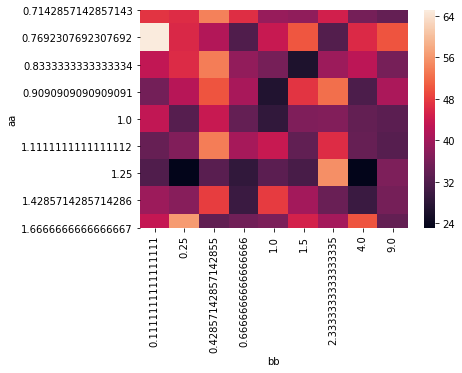

In [10]:
import pandas as pd
import seaborn as sns
y=pd.DataFrame({'aa':aa,'bb':bb,'themean':themean})
y=y.pivot(index='aa',columns='bb',values='themean')
ax=sns.heatmap(y)